 Plotting histograms for numerical features:


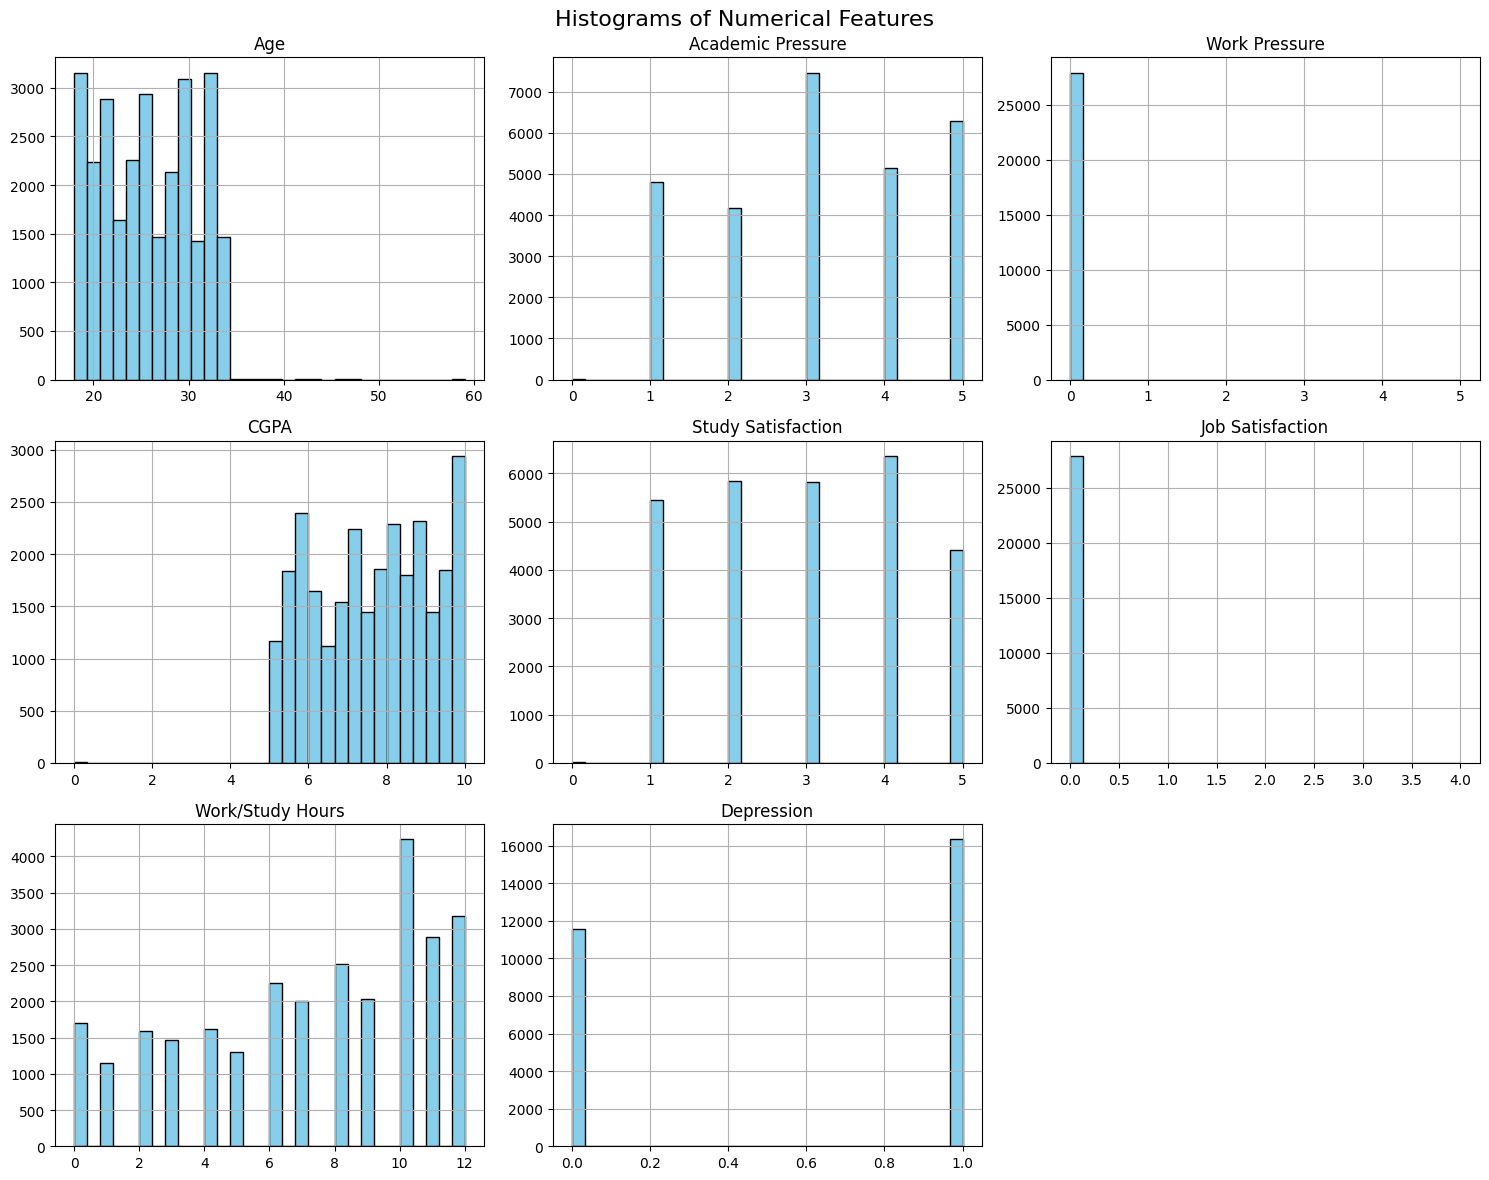

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# بارگذاری داده‌ها از فایل CSV
df = pd.read_csv("student_depression_dataset.csv")

# حذف ستون "id" که برای شناسایی یکتای دانشجویان است و به تجزیه و تحلیل نیازی ندارد
df = df.drop(columns=["id"])

# تعیین نوع ویژگی‌ها: عددی vs متنی
# ویژگی‌های عددی شامل ستون‌هایی هستند که نوع داده آنها int64 یا float64 است
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns  # ویژگی‌های عددی
# ویژگی‌های متنی (دسته‌ای) شامل ستون‌هایی هستند که نوع داده آنها object است
categorical_cols = df.select_dtypes(include=["object"]).columns  # ویژگی‌های دسته‌ای (متنی)

# رسم هیستوگرام برای ستون‌های عددی
# هیستوگرام‌ها برای ویژگی‌های عددی با استفاده از متد hist رسم می‌شوند. 
# برای هر ستون عددی یک هیستوگرام به تعداد bins معین نمایش داده می‌شود.
print("\033[94m Plotting histograms for numerical features:\033[0m")
df[numeric_cols].hist(bins=30, figsize=(15, 12), color='skyblue', edgecolor='black')

# افزودن عنوان به نمودار
plt.suptitle("Histograms of Numerical Features", fontsize=16)

# تنظیمات نمایش نمودار
plt.tight_layout()  # تنظیم چیدمان نمودار برای جلوگیری از هم‌پوشانی
plt.show()  # نمایش نمودار



 Plotting histograms for categorical features:


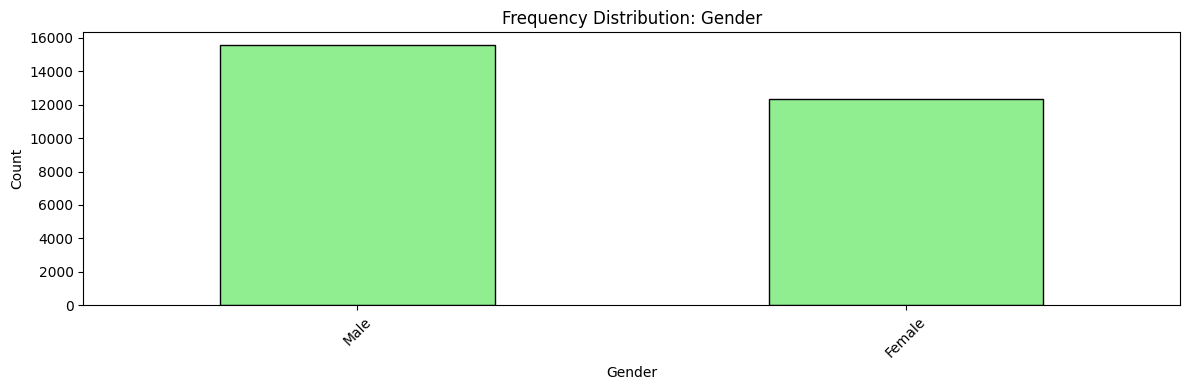

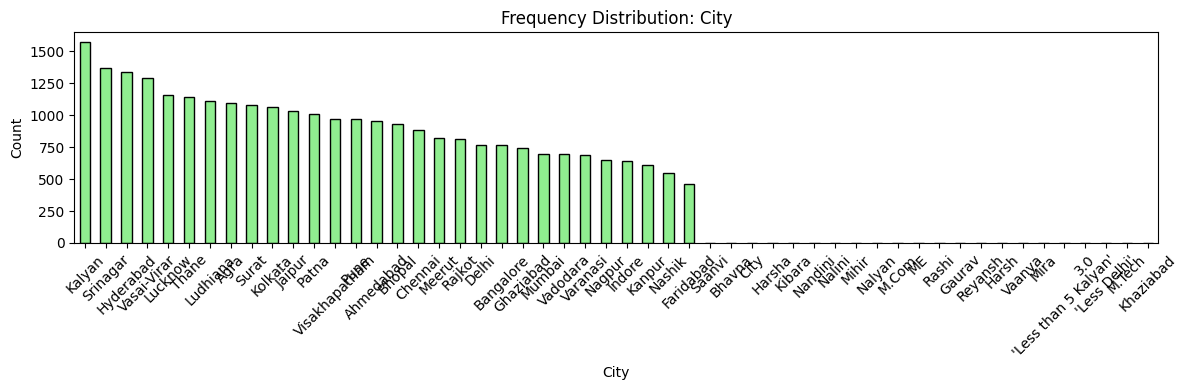

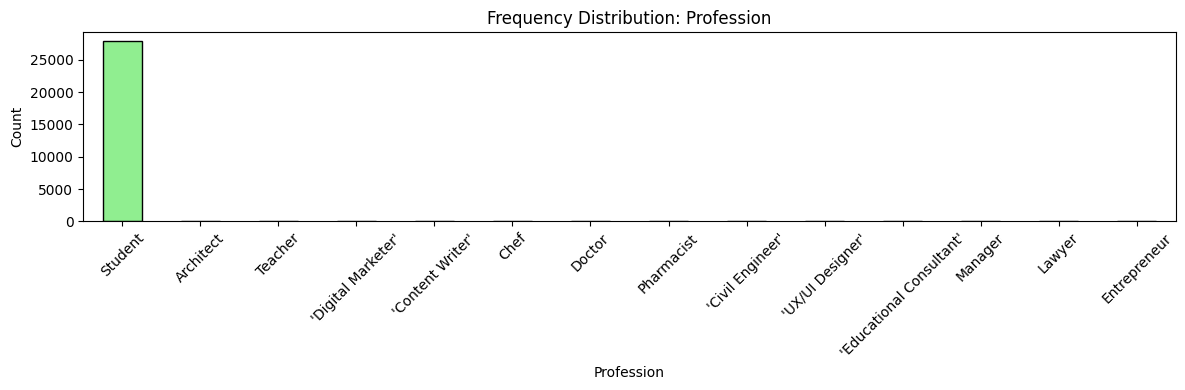

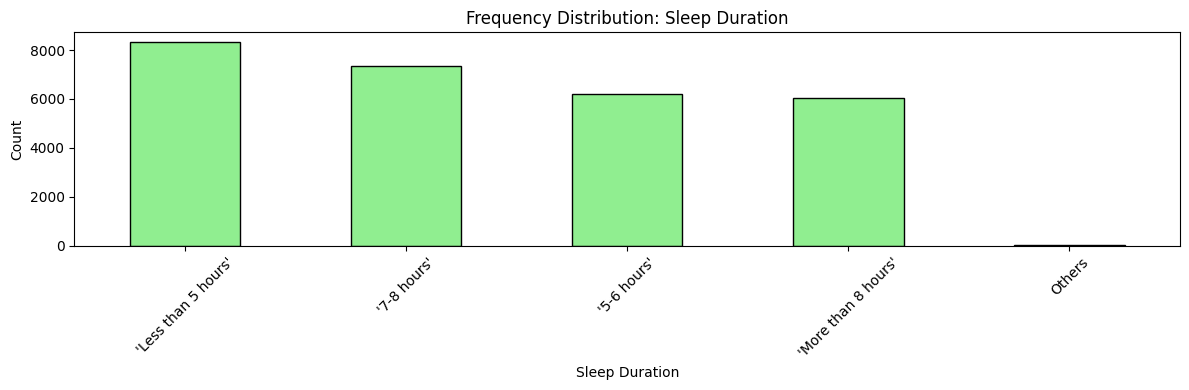

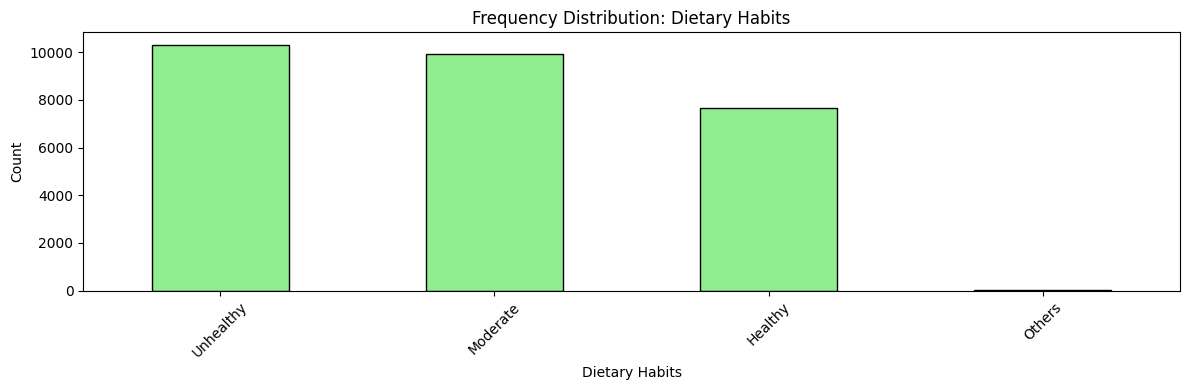

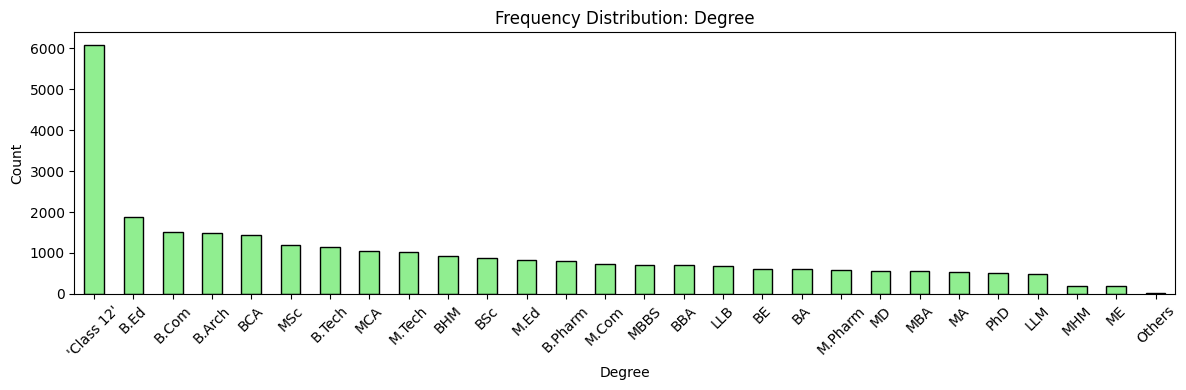

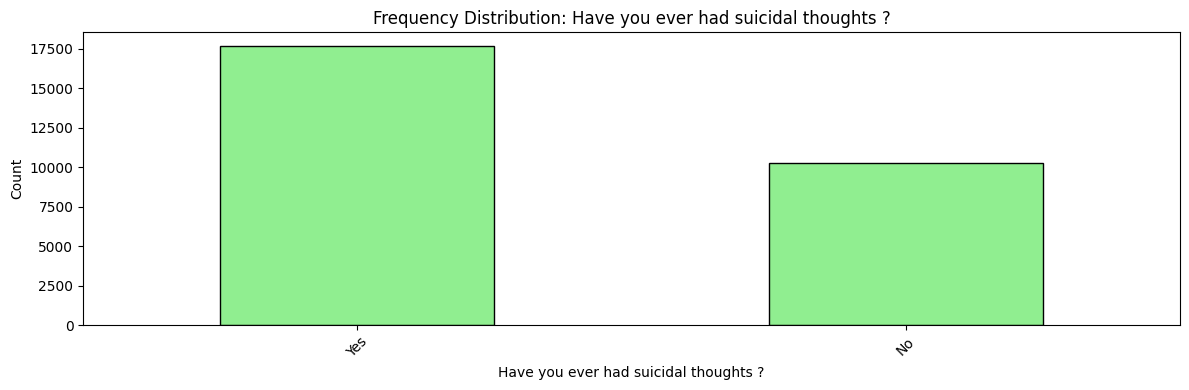

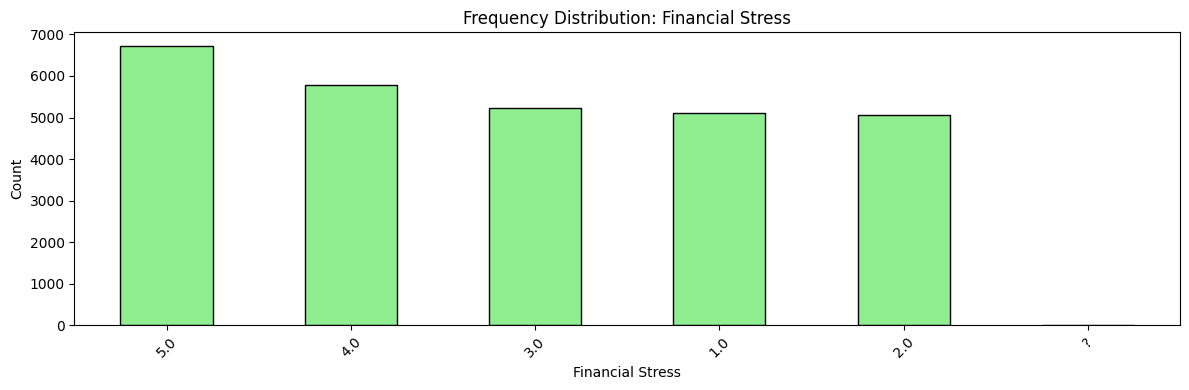

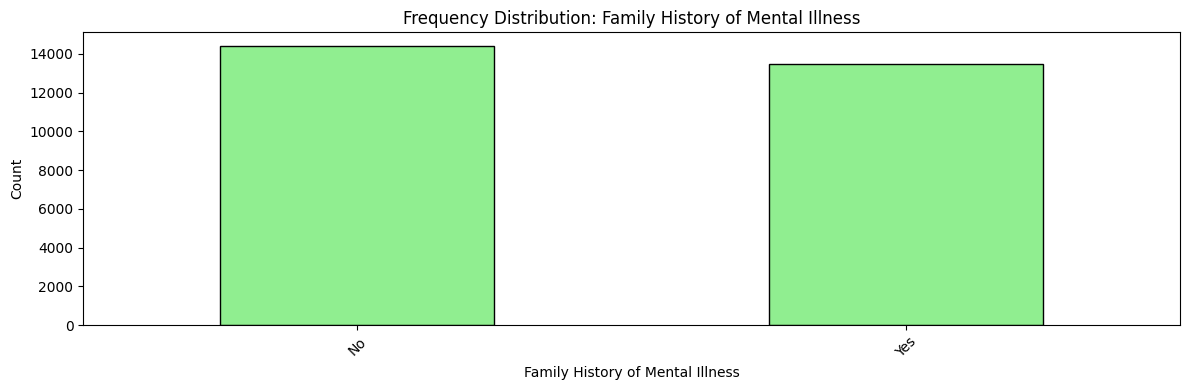

In [9]:
# رسم هیستوگرام برای ویژگی‌های متنی (categorical)
# در این بخش برای هر ویژگی دسته‌ای (متنی) یک نمودار میله‌ای رسم می‌شود که تعداد نمونه‌ها در هر دسته را نشان می‌دهد.
print("\n\033[94m Plotting histograms for categorical features:\033[0m")  # توضیح انگلیسی برای ویژگی‌های دسته‌ای

# پیمایش تمام ویژگی‌های دسته‌ای
for col in categorical_cols:
    # برای هر ویژگی دسته‌ای یک شکل جدید با اندازه معین ساخته می‌شود
    plt.figure(figsize=(12, 4))
    
    # رسم نمودار میله‌ای برای نمایش توزیع فراوانی مقادیر هر ویژگی دسته‌ای
    df[col].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')  # رسم نمودار میله‌ای برای ویژگی‌های دسته‌ای
    
    # عنوان نمودار که نام ویژگی دسته‌ای را نمایش می‌دهد
    plt.title(f"Frequency Distribution: {col}")  # عنوان انگلیسی برای هر ویژگی دسته‌ای
    
    # برچسب محور عمودی (تعداد داده‌ها)
    plt.ylabel("Count")  # برچسب محور عمودی به زبان انگلیسی
    
    # چرخاندن برچسب‌های محور X به اندازه 45 درجه برای جلوگیری از هم‌پوشانی
    plt.xticks(rotation=45)  # چرخاندن برچسب‌های محور X
    
    # تنظیم چیدمان برای جلوگیری از هم‌پوشانی نمودار
    plt.tight_layout()
    
    # نمایش نمودار
    plt.show()


ویژگی: Age
→ تعداد موارد پرت: 12
→ بازه نرمال: [7.50, 43.50]
→ نمونه‌ای از outlierها:
       Age
2909  58.0
3436  49.0
4386  51.0
5537  44.0
9006  46.0



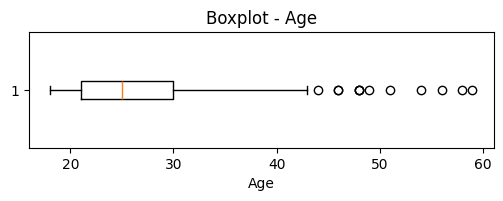

ویژگی: CGPA
→ تعداد موارد پرت: 9
→ بازه نرمال: [2.35, 12.87]
→ نمونه‌ای از outlierها:
       CGPA
4365    0.0
10407   0.0
11489   0.0
13909   0.0
14855   0.0



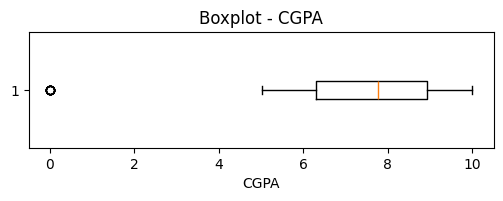

ویژگی: Work/Study Hours
→ تعداد موارد پرت: 0
→ بازه نرمال: [-5.00, 19.00]
→ نمونه‌ای از outlierها:
Empty DataFrame
Columns: [Work/Study Hours]
Index: []



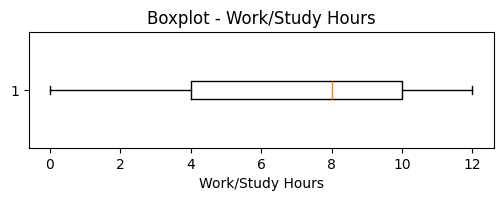

ویژگی: Academic Pressure
→ تعداد موارد پرت: 0
→ بازه نرمال: [-1.00, 7.00]
→ نمونه‌ای از outlierها:
Empty DataFrame
Columns: [Academic Pressure]
Index: []



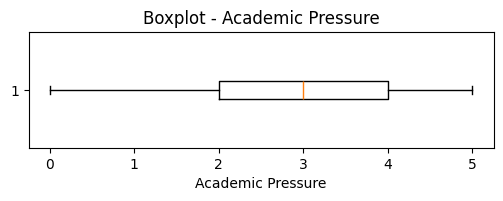

ویژگی: Study Satisfaction
→ تعداد موارد پرت: 0
→ بازه نرمال: [-1.00, 7.00]
→ نمونه‌ای از outlierها:
Empty DataFrame
Columns: [Study Satisfaction]
Index: []



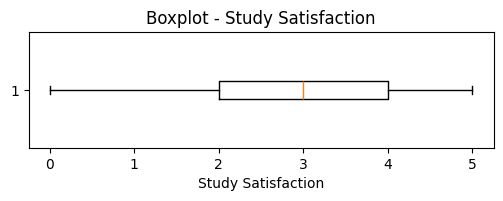

In [10]:
import pandas as pd  # برای استفاده از pandas برای پردازش داده‌ها
import matplotlib.pyplot as plt  # برای رسم نمودارها

# تابع تشخیص مقادیر پرت با استفاده از IQR (Interquartile Range)
# این تابع مقادیر پرت را با استفاده از روش IQR شناسایی می‌کند
def detect_outliers_IQR(data, feature):
    # محاسبه‌ی Q1 (نمره‌ی چارک اول) و Q3 (نمره‌ی چارک سوم)
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    
    # محاسبه‌ی IQR (فاصله‌ی میان چارک‌ها)
    IQR = Q3 - Q1
    
    # تعریف محدوده‌ی نرمال داده‌ها
    lower = Q1 - 1.5 * IQR  # حد پایین برای مقادیر نرمال
    upper = Q3 + 1.5 * IQR  # حد بالایی برای مقادیر نرمال
    
    # شناسایی مقادیر پرت که از محدوده‌ی نرمال خارج هستند
    outliers = data[(data[feature] < lower) | (data[feature] > upper)]
    return outliers, lower, upper

# لیست ویژگی‌های عددی که باید بررسی شوند
features_to_check = ["Age", "CGPA", "Work/Study Hours", "Academic Pressure", "Study Satisfaction"]

# برای هر ویژگی در لیست features_to_check، مقادیر پرت شناسایی می‌شود
for feature in features_to_check:
    # شناسایی مقادیر پرت با استفاده از تابع detect_outliers_IQR
    outliers, lower, upper = detect_outliers_IQR(df, feature)
    
    # چاپ اطلاعات مربوط به ویژگی و مقادیر پرت
    print(f"\033[91mویژگی: {feature}\033[0m")
    print(f"→ تعداد موارد پرت: {len(outliers)}")  # تعداد مقادیر پرت
    print(f"→ بازه نرمال: [{lower:.2f}, {upper:.2f}]")  # بازه نرمال برای مقادیر
    print(f"→ نمونه‌ای از outlierها:")
    print(outliers[[feature]].head(), end="\n\n")

    # رسم نمودار Boxplot برای تصویر بهتر مقادیر پرت
    plt.figure(figsize=(6, 1.5))  # اندازه نمودار تنظیم می‌شود
    plt.boxplot(df[feature], vert=False)  # رسم Boxplot افقی برای ویژگی
    plt.title(f"Boxplot - {feature}")  # عنوان نمودار شامل نام ویژگی
    plt.xlabel(feature)  # برچسب محور X
    plt.show()  # نمایش نمودار
